In this notebook I want to show how to use LinearRegression model with scikit-learn toolbox for Python.

In [1]:
from sklearn.datasets import make_regression
from sklearn import linear_model

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### Constants

In [2]:
DATA_NUM = 1000

### Generate problem

In [3]:
def generate_linear_regression_problem(samples_num):
    """Function that uses 'make_regression' of sklearn as a core. It's purpose it to 
    generate point that can be aproximated by linear function. Returns tuple of data 
    and it's labels.
    
    Arguments:
    ---------
    samples_num: int
        Numer of points that should be generated.
    """
    bias = np.random.uniform(-5, 5)
    data_noise = np.random.uniform(4, 8)
    x_values, y_values = make_regression(n_samples=samples_num, n_features=1, noise=data_noise, 
                                         bias=bias)
    
    return x_values, y_values.reshape(-1, 1)

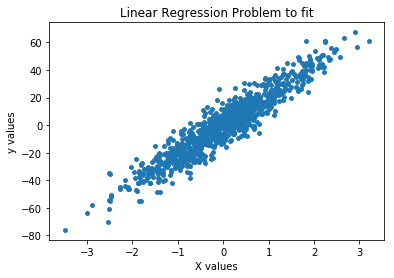

In [4]:
# Generating values 'X' and labels 'y'
X, y = generate_linear_regression_problem(DATA_NUM)

# Presenting generated data
plt.scatter(X, y, s=15)
plt.title("Linear Regression Problem to fit")
plt.xlabel("X values")
plt.ylabel("y values")
plt.show()

### Linear Regression - by scikit-learn

Creating Linear Regression model with feature scaling already embedded in model

In [5]:
linear_regression = linear_model.LinearRegression(normalize=True)

Fitting to generated data

In [6]:
linear_regression.fit(X, y)

/Users/F1sherKK/.pyenv/versions/3.6.1/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Training results

In [7]:
# Trained weights of Linear Model - w0 + w1 * x
print("Weights: " + str(linear_regression.intercept_) + str(linear_regression.coef_))

Weights: [ 0.22526781][[ 21.24039496]]


In [8]:
# Error - Mean Squared Errors
print("Minimized error value: " + str(np.mean((linear_regression.predict(X) - y) ** 2)))

Minimized error value: 55.0145353001


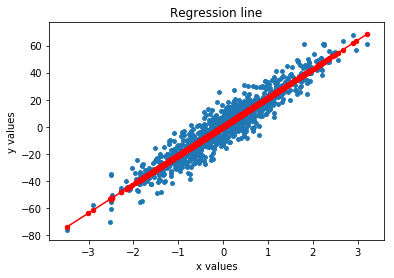

In [9]:
# Displaying dataset
plt.scatter(X, y, s=15)

# Displaying aproximated function
function_x = np.arange(np.min(X), np.max(X), 0.01).reshape(-1, 1)
plt.plot(function_x, linear_regression.predict(function_x), c="red")
plt.scatter(X, linear_regression.predict(X), s=20, c='red')

plt.title("Regression line")
plt.ylabel("y values")
plt.xlabel("x values")
plt.show()